# 🚢 **Titanic survival prediction**
___

## 📃**The Problem** ##
This is a notebook about the famous Titanic survival prediction.

⚙ **Setup**

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

import warnings


parent_dir = os.path.abspath("..")
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from _custom_func import extract_data


sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
sklearn.set_config(display="diagram")


warnings.filterwarnings("ignore")

print("\n💯 😊 Setup successfully loaded to memory.")


💯 😊 Setup successfully loaded to memory.


## 📝 **Get the data**

The data is the famouus titanic dataset, downloaded from 👉 [here](https://kagggke.com/).

In [9]:
try:
    extract_data("../datasets/Titanic-Dataset.zip")
    df = pd.read_csv("./data/Titanic-Dataset.csv")
    print("\nData loaded successfully . . .")
except Exception as e:
    print("\033[031mError in loading data . . .\033[0m\n", e)


Data loaded successfully . . .


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 🔎 **Explore the data**

Exploring the data through summary statistics and visualizations

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The `Age` and `Cabin` attributes were missinng for some passengers.

**Get summary statistics for the neccessary attrributes.**

In [6]:
df_num = df.select_dtypes(include=np.number)
df_num.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The median age is $28$, meaning that half of the total passengers have ages that are less than or equal to $28$. The maximum age is $80$, meaning that there are children, youtg and adults in the ship. The mean age is $29$, that is most passengers are youths. The age attribute was not copletely recorded.

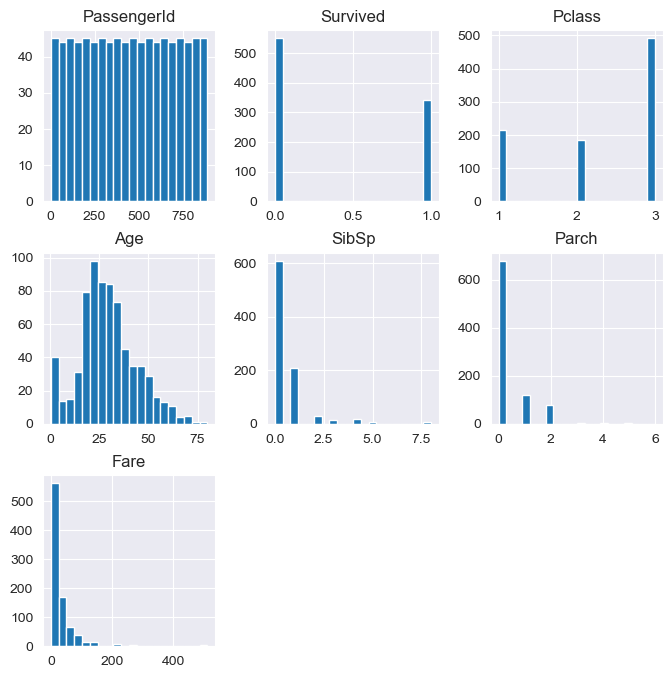

In [10]:
ax = df_num.hist(bins=20, figsize=(8,8))
plt.show()

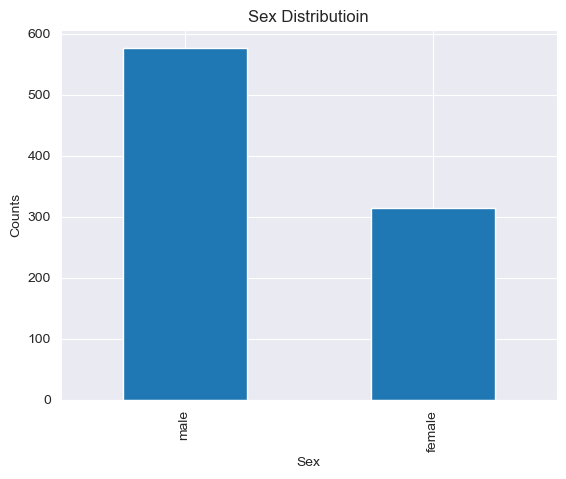

In [13]:
ax = df.Sex.value_counts().plot.bar()
ax.set_title("Sex Distributioin")
ax.yaxis.set_label_text("Counts")
plt.show()

- There are more male passengers than female passengers.